In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flowers-recognition/flowers/sunflower/184682320_73ccf74710.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/2307673262_e1e1aefd29.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/15054864058_2edca122a9_n.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/9448615838_04078d09bf_n.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/20938724084_7fe6bf87ae_n.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/3154932076_eff5c38231_n.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/14121915990_4b76718077_m.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/12471290635_1f9e3aae16_n.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/417251603_69f0ee57a9_m.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/19710076021_f5bb162540.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/15054752730_fcf54d475e_m.jpg
/kaggle/input/flowers-recognition/flowers/sunflower/4623843480_23e3fb8dcc_n.jpg
/kaggle/input/flowers-recognition/flowers/

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG16
from sklearn.preprocessing import LabelBinarizer
import cv2
import tensorflow as tf

Using TensorFlow backend.


In [3]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
data = get_data("/kaggle/input/flowers-recognition/flowers")

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [5]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [6]:
x = np.array(x) / 255

In [7]:
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [8]:
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_train)

In [11]:
pre_trained_model = VGG16(input_shape=(150,150,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = False
    
model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(5 , activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

58892288/58889256 [==============================] - 2s 0us/step


In [12]:
predictions = model.predict_classes(x_test)

In [13]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [14]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

28/28 [==============================] - 103s 4s/step - loss: 1.8273 - accuracy: 0.1214
Accuracy of the model is -  12.1387280523777 %


In [15]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

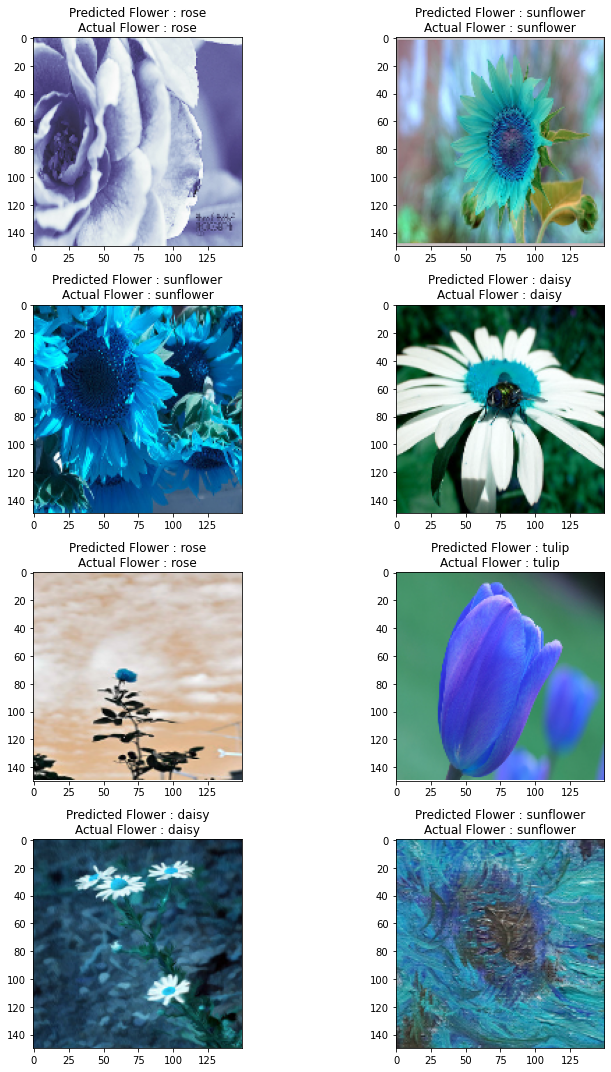

In [16]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1